In [3]:
import pandas as pd
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

import matplotlib.pyplot as plt

In [4]:
movieData = pd.read_csv("../resources/movieData.csv", converters={'genres': literal_eval, 'production_countries': literal_eval, 'directors': literal_eval, 'actors': literal_eval})
showData = pd.read_csv("../resources/showData.csv", converters={'genres': literal_eval, 'production_countries': literal_eval, 'directors': literal_eval, 'actors': literal_eval})
movieData.drop(columns=['Unnamed: 0', 'id', 'title', 'directors', 'actors', 'release_year'], inplace=True)
showData.drop(columns=['Unnamed: 0', 'id', 'title', 'directors', 'actors', 'release_year'], inplace=True)

In [5]:
movieEx = movieData.explode(column='genres').explode(column='production_countries').fillna(0)
showEx = showData.explode(column='genres').explode(column='production_countries').fillna(0)
movieEx

,release_decade,age_certification,runtime,genres,production_countries,imdb_score,imdb_votes
0,70s,R,114,drama,US,8.2,808582.0
0,70s,R,114,crime,US,8.2,808582.0
1,70s,R,109,drama,US,7.7,107673.0
1,70s,R,109,action,US,7.7,107673.0
1,70s,R,109,thriller,US,7.7,107673.0
...,...,...,...,...,...,...,...
3425,20s,0,93,drama,EG,5.0,327.0
3426,20s,0,100,romance,NG,6.8,45.0
3426,20s,0,100,drama,NG,6.8,45.0
3427,20s,0,134,drama,0,7.7,348.0


In [6]:
replaceProductionMovie = [country for country in movieEx["production_countries"].value_counts().index if movieEx["production_countries"].value_counts()[country] < 135]
for country in replaceProductionMovie:
    movieEx['production_countries'] = movieEx['production_countries'].replace(country, "other")
    showEx['production_countries'] = showEx['production_countries'].replace(country, "other")

In [7]:
movieDummies = pd.get_dummies(movieEx, columns=['release_decade', 'age_certification', 'genres', 'production_countries'])
movieDummies

,runtime,imdb_score,imdb_votes,release_decade_00s,release_decade_10s,release_decade_20s,release_decade_50s,release_decade_60s,release_decade_70s,release_decade_80s,...,production_countries_GB,production_countries_ID,production_countries_IN,production_countries_IT,production_countries_JP,production_countries_KR,production_countries_MX,production_countries_PH,production_countries_US,production_countries_other
0,114,8.2,808582.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
0,114,8.2,808582.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,109,7.7,107673.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,109,7.7,107673.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,109,7.7,107673.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,93,5.0,327.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3426,100,6.8,45.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3426,100,6.8,45.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3427,134,7.7,348.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
showDummies = pd.get_dummies(showEx, columns=['release_decade', 'age_certification', 'genres', 'production_countries', 'seasons'])
showDummies

,runtime,imdb_score,imdb_votes,release_decade_00s,release_decade_10s,release_decade_20s,release_decade_60s,release_decade_70s,release_decade_80s,release_decade_90s,...,seasons_19.0,seasons_20.0,seasons_21.0,seasons_24.0,seasons_25.0,seasons_29.0,seasons_32.0,seasons_37.0,seasons_39.0,seasons_42.0
0,30,8.8,73424.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,30,8.8,73424.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,43,8.1,2151.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,24,8.9,308824.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,51,6.9,34115.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,37,5.1,738.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1937,37,5.1,738.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1938,7,7.8,18.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1938,7,7.8,18.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
yShowScore = showDummies['imdb_score']
yMovieScore = movieDummies['imdb_score']
yShowVotes = showDummies['imdb_votes']
yMovieVotes = movieDummies['imdb_votes']

In [10]:
XShowScore = showDummies.drop(columns='imdb_score')
XMovieScore = movieDummies.drop(columns='imdb_score')
XShowVotes = showDummies.drop(columns='imdb_votes')
XMovieVotes = movieDummies.drop(columns='imdb_votes')

In [11]:
# Movie Score Train, Test, Scale
XtrainMS, XtestMS, ytrainMS, ytestMS = train_test_split(XMovieScore, yMovieScore, random_state=1)

scaler = StandardScaler()

XscalerMS = scaler.fit(XtrainMS)

XtrainScaledMS = XscalerMS.transform(XtrainMS)
XtestScaledMS = XscalerMS.transform(XtestMS)

In [12]:
# tf.keras.backend.clear_session()
nn = tf.keras.models.Sequential()


nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=53))

nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                4320      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 7,711
Trainable params: 7,711
Non-trainable params: 0
_________________________________________________________________


In [13]:
nn.compile(loss='mean_absolute_error', optimizer="adam")

In [17]:
fit_model = nn.fit(XtrainScaledMS, ytrainMS, epochs=100)

Epoch 1/100
259/259 [==============================] - 0s 1ms/step - loss: 0.6003
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.6018
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5951
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5983
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5947
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5944
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5944
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5941
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5942
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5922
Epoch 11/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5883
Epoch 12/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5899
Epoch 13/100


In [18]:
model_loss = nn.evaluate(XtestScaledMS, ytestMS, verbose=2)
print(model_loss)

87/87 - 0s - loss: 0.7025 - 76ms/epoch - 874us/step
0.7025031447410583


87/87 [==============================] - 0s 733us/step


Text(0.5, 1.0, 'Small DNN (53 Features)')

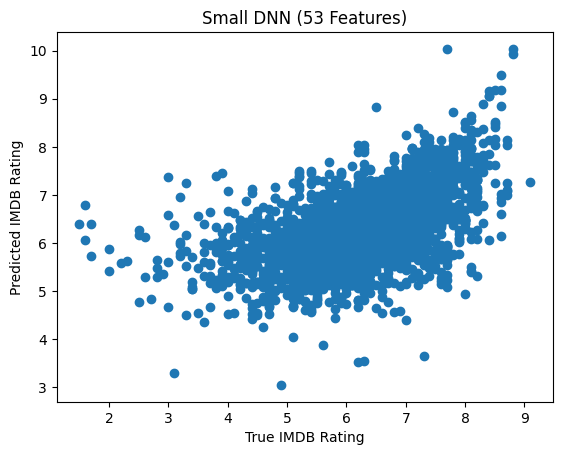

In [20]:
testPredictions = nn.predict(XtestScaledMS).flatten()
plt.scatter(ytestMS, testPredictions)
plt.xlabel('True IMDB Rating')
plt.ylabel('Predicted IMDB Rating')
plt.title('Small DNN (53 Features)')